In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from random import randint
import numpy as np
#|import warnings
import os

#warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
from data import create_mnist_dataset

In [2]:
#train-images-idx3-ubyte
!ls ../../../../AA_data/MNIST_Data/

mnist_test.csv		   t10k-labels.idx1-ubyte
mnist_train.csv		   train-images-idx3-ubyte.gz
t10k-images-idx3-ubyte.gz  train-images.idx3-ubyte
t10k-images.idx3-ubyte	   train-labels-idx1-ubyte.gz
t10k-labels-idx1-ubyte.gz  train-labels.idx1-ubyte


In [3]:
batch_size = 100
# create datasets for training and evaluation
train_ds, train_size = create_mnist_dataset(batch_size, 'train')
eval_ds, eval_size = create_mnist_dataset(batch_size, 'val')

# create a reinitializable with the correct structure (but unbounded to any dataset)
iterator: tf.data.Iterator = tf.data.Iterator.from_structure(train_ds.output_types, train_ds.output_shapes)
images, labels = iterator.get_next()

In [4]:
type(train_ds)

tensorflow.python.data.ops.dataset_ops.MapDataset

In [5]:
logs_path = 'log_mnist_softmax'
mnist = input_data.read_data_sets("data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


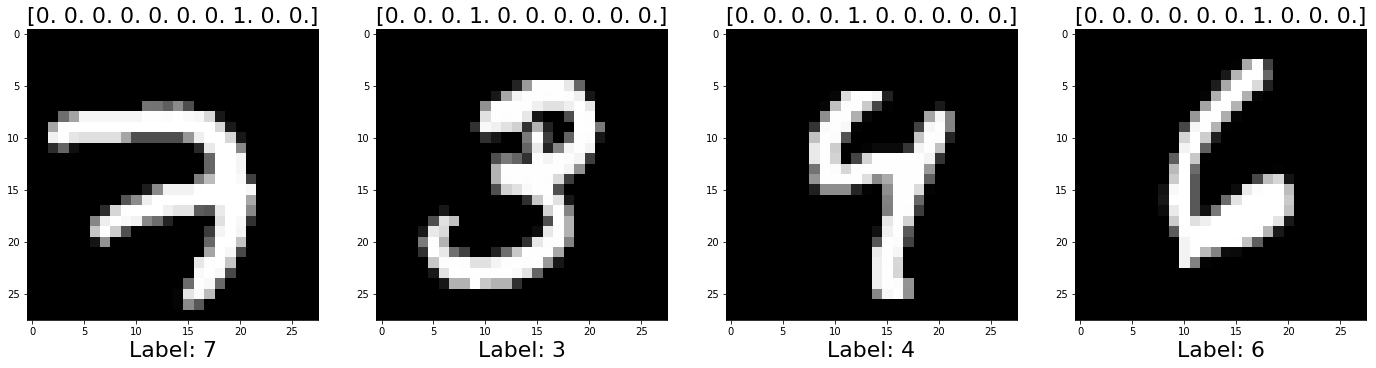

In [6]:
fig = plt.figure()
cols=1
n_images=4
for i in range(4):
    a = fig.add_subplot(cols,np.ceil(n_images/float(cols)), i+1)
    plt.imshow(np.resize(mnist.train.images[i],(28,28)), cmap='Greys_r')
    a.set_title(mnist.train.labels[i],fontdict={'fontsize':22})
    a.set_xlabel("Label: " + str(np.argmax(mnist.train.labels[i])),fontdict={'fontsize':22})
fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()

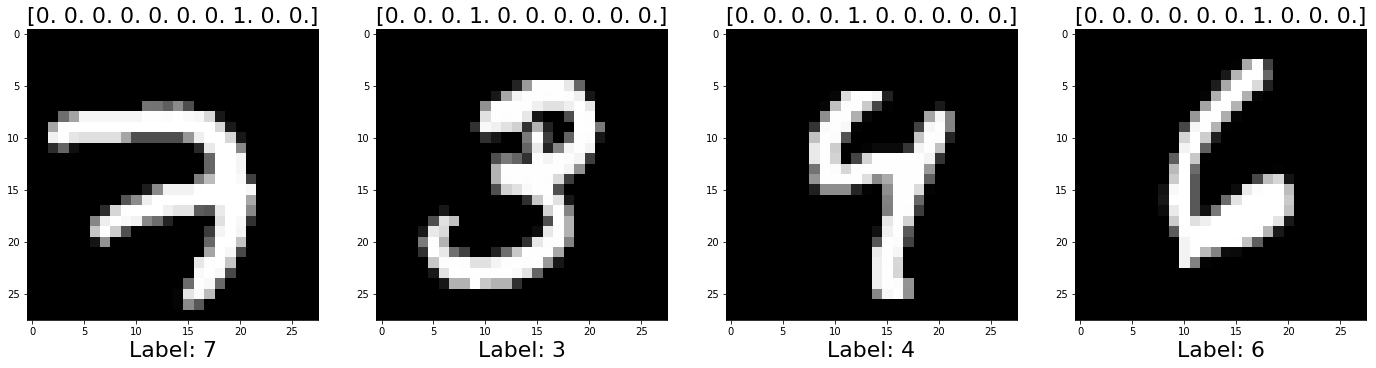

In [7]:
fig = plt.figure()
cols=1
n_images=4
for i in range(4):
    a = fig.add_subplot(cols,np.ceil(n_images/float(cols)), i+1)
    plt.imshow(np.resize(mnist.train.images[i],(28,28)), cmap='Greys_r')
    a.set_title(mnist.train.labels[i],fontdict={'fontsize':22})
    a.set_xlabel("Label: " + str(np.argmax(mnist.train.labels[i])),fontdict={'fontsize':22})
fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
plt.show()

In [8]:
28*28

784

In [9]:
X = tf.placeholder(tf.float32, [None, 784], name="input")
Y_ = tf.placeholder(tf.float32, [None, 10], name='LabelData')
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
XX = tf.reshape(X, [-1, 784])

Y = tf.nn.softmax(tf.matmul(XX, W) + b, name="output")
# for later versions of tf should use tf.nn.softmax_cross_entropy_with_logits_v2
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y_, logits=Y))

In [10]:
mnist.train.num_examples

55000

In [11]:
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

train_step = tf.train.GradientDescentOptimizer(0.005).minimize(cross_entropy)

tf.summary.scalar("cost", cross_entropy)
tf.summary.scalar("accuracy", accuracy)
summary_op = tf.summary.merge_all()

Epoch:  0   Accuracy:  0.4526
Epoch:  10   Accuracy:  0.7945
Epoch:  20   Accuracy:  0.8129
Epoch:  30   Accuracy:  0.8204
Epoch:  40   Accuracy:  0.8253
Epoch:  50   Accuracy:  0.8298
Epoch:  60   Accuracy:  0.866
Epoch:  70   Accuracy:  0.8837
Epoch:  80   Accuracy:  0.8931
Epoch:  90   Accuracy:  0.8963
Epoch:  99   Accuracy:  0.8981
Final Accuracy:  0.8981
done training


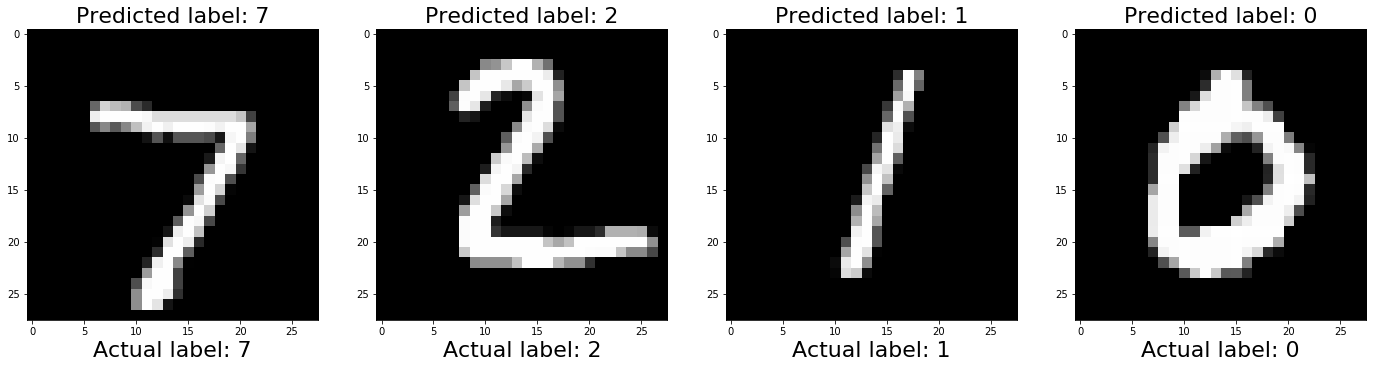

In [12]:
learning_rate = 0.5
training_epochs = 100
print_every = 10
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter(logs_path, \
                                    graph=tf.get_default_graph())
    for epoch in range(training_epochs):
        batch_count = int(mnist.train.num_examples/batch_size)
        for i in range(batch_count):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, summary = sess.run([train_step, summary_op],\
                                  feed_dict={X: batch_x,\
                                             Y_: batch_y})
            writer.add_summary(summary, epoch * batch_count + i)
        if epoch % print_every == 0 or epoch == training_epochs-1:
            print("Epoch: ", epoch, "  Accuracy: ", accuracy.eval(feed_dict={X: mnist.test.images, Y_: mnist.test.labels}))

    print("Final Accuracy: ", accuracy.eval(feed_dict={X: mnist.test.images, Y_: mnist.test.labels}))
    print("done training")            

    # Now plot the results
    fig = plt.figure()
    cols=1
    n_images=4
    for num in range(n_images):
        a = fig.add_subplot(cols,np.ceil(n_images/float(cols)), num+1)
        img = mnist.test.images[num] 
        plt.imshow(np.resize(img,(28,28)), cmap='Greys_r')
        classification = sess.run(tf.argmax(Y, 1), feed_dict={X: [img]})
        a.set_title("Predicted label: " + str(classification[0]),fontdict={'fontsize':22})
        a.set_xlabel("Actual label: " + str(np.argmax(mnist.test.labels[num])),fontdict={'fontsize':22})
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

#     classification = sess.run(tf.argmax(Y, 1), feed_dict={X: [img]})
#     print('Neural Network predicted', classification[0])
#     print('Real label is:', np.argmax(mnist.test.labels[num]))

#     saver = tf.train.Saver()
#     save_path = saver.save(sess, "data/saved_mnist_cnn.ckpt")
#     print("Model saved to %s" % save_path)